# Project Shelter Animal Outcome

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os import getcwd

from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

%matplotlib inline
from pandas.api.types import CategoricalDtype

pd.set_option('notebook_repr_html', True)

In [6]:
animals = pd.read_csv(getcwd() + "\\train.csv")
animals['DateTime'] = pd.to_datetime(animals.DateTime)
#animals.count()
animals.set_index('DateTime', inplace=True)
animals.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
DateTime,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
2014-07-11 19:09:00,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
2013-11-15 12:52:00,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [7]:
animals.groupby('AnimalType').count()['AnimalID']

AnimalType
Cat    11134
Dog    15595
Name: AnimalID, dtype: int64

In [8]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26729 entries, 2014-02-12 18:22:00 to 2015-07-02 09:00:00
Data columns (total 9 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [9]:
# Dates

In [10]:
animals['Month'] = animals.index.month
animals['MonthName'] = animals.index.strftime('%B')
month_values = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
month_cat_type = CategoricalDtype(categories=month_values, ordered=True)
animals.MonthName = animals.MonthName.astype(month_cat_type)
animals['IsAdopted'] = animals.OutcomeType.str.contains('Adoption')
animals['MonthName'].head(5)

DateTime
2014-02-12 18:22:00    February
2013-10-13 12:44:00     October
2015-01-31 12:28:00     January
2014-07-11 19:09:00        July
2013-11-15 12:52:00    November
Name: MonthName, dtype: category
Categories (12, object): [January < February < March < April ... September < October < November < December]

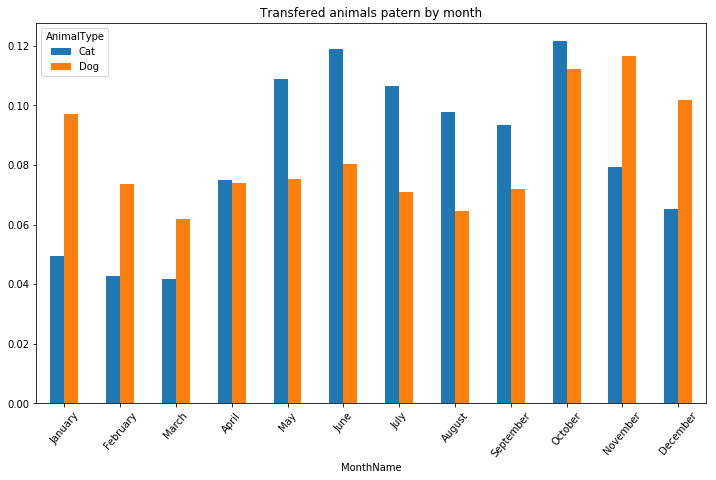

In [11]:
Transfered = (animals.OutcomeType == 'Transfer')
pd.crosstab(index=animals[Transfered].MonthName, columns= animals[Transfered].AnimalType, normalize = 'columns').plot(kind='bar', title = 'Transfered animals patern by month', rot=50, figsize=(12, 7))

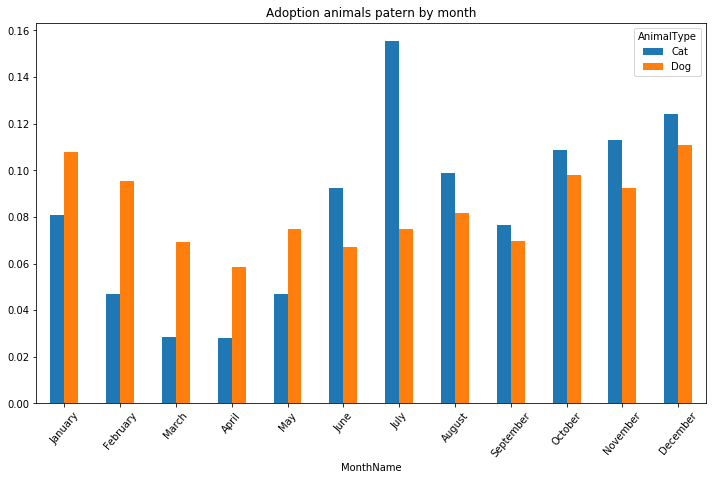

In [12]:
Adoption = (animals.OutcomeType == 'Adoption')
pd.crosstab(index=animals[Adoption].MonthName, columns= animals[Adoption].AnimalType, normalize = 'columns').plot(kind='bar', title = 'Adoption animals patern by month', rot=50, figsize=(12, 7))

In [13]:
pd.crosstab(index = animals.MonthName, columns = [animals.OutcomeType,animals.AnimalType], normalize='columns')

OutcomeType  Adoption                Died       Euthanasia            \
AnimalType        Cat       Dog       Cat   Dog        Cat       Dog   
MonthName                                                              
January      0.080758  0.107742  0.040816  0.12   0.067606  0.081657   
February     0.046816  0.095275  0.034014  0.10   0.054930  0.082840   
March        0.028558  0.069109  0.047619  0.08   0.053521  0.082840   
April        0.028090  0.058489  0.020408  0.08   0.063380  0.066272   
May          0.047051  0.074650  0.081633  0.12   0.087324  0.080473   
June         0.092228  0.067108  0.149660  0.10   0.139437  0.073373   
July         0.155431  0.074958  0.183673  0.04   0.091549  0.094675   
August       0.099017  0.081884  0.074830  0.12   0.092958  0.053254   
September    0.076545  0.069724  0.061224  0.06   0.071831  0.065089   
October      0.108614  0.098045  0.149660  0.10   0.100000  0.118343   
November     0.112828  0.092196  0.115646  0.00   0.087324  0.099408   
December     0.124064  0.110820  0.040816  0.08   0.090141  0.101775   

OutcomeType Return_to_owner            Transfer            
AnimalType              Cat       Dog       Cat       Dog  
MonthName                                                  
January               0.108  0.105693  0.049591  0.097013  
February              0.062  0.088894  0.042688  0.073526  
March                 0.084  0.068595  0.041780  0.061782  
April                 0.072  0.080028  0.074841  0.074036  
May                   0.048  0.080028  0.108629  0.075313  
June                  0.074  0.068829  0.118801  0.080419  
July                  0.066  0.066262  0.106449  0.070973  
August                0.096  0.058329  0.097729  0.064590  
September             0.074  0.063696  0.093370  0.071994  
October               0.086  0.100560  0.121526  0.112076  
November              0.118  0.110126  0.079382  0.116416  
December              0.112  0.108959  0.065213  0.101864

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE88940>,
      dtype=object)

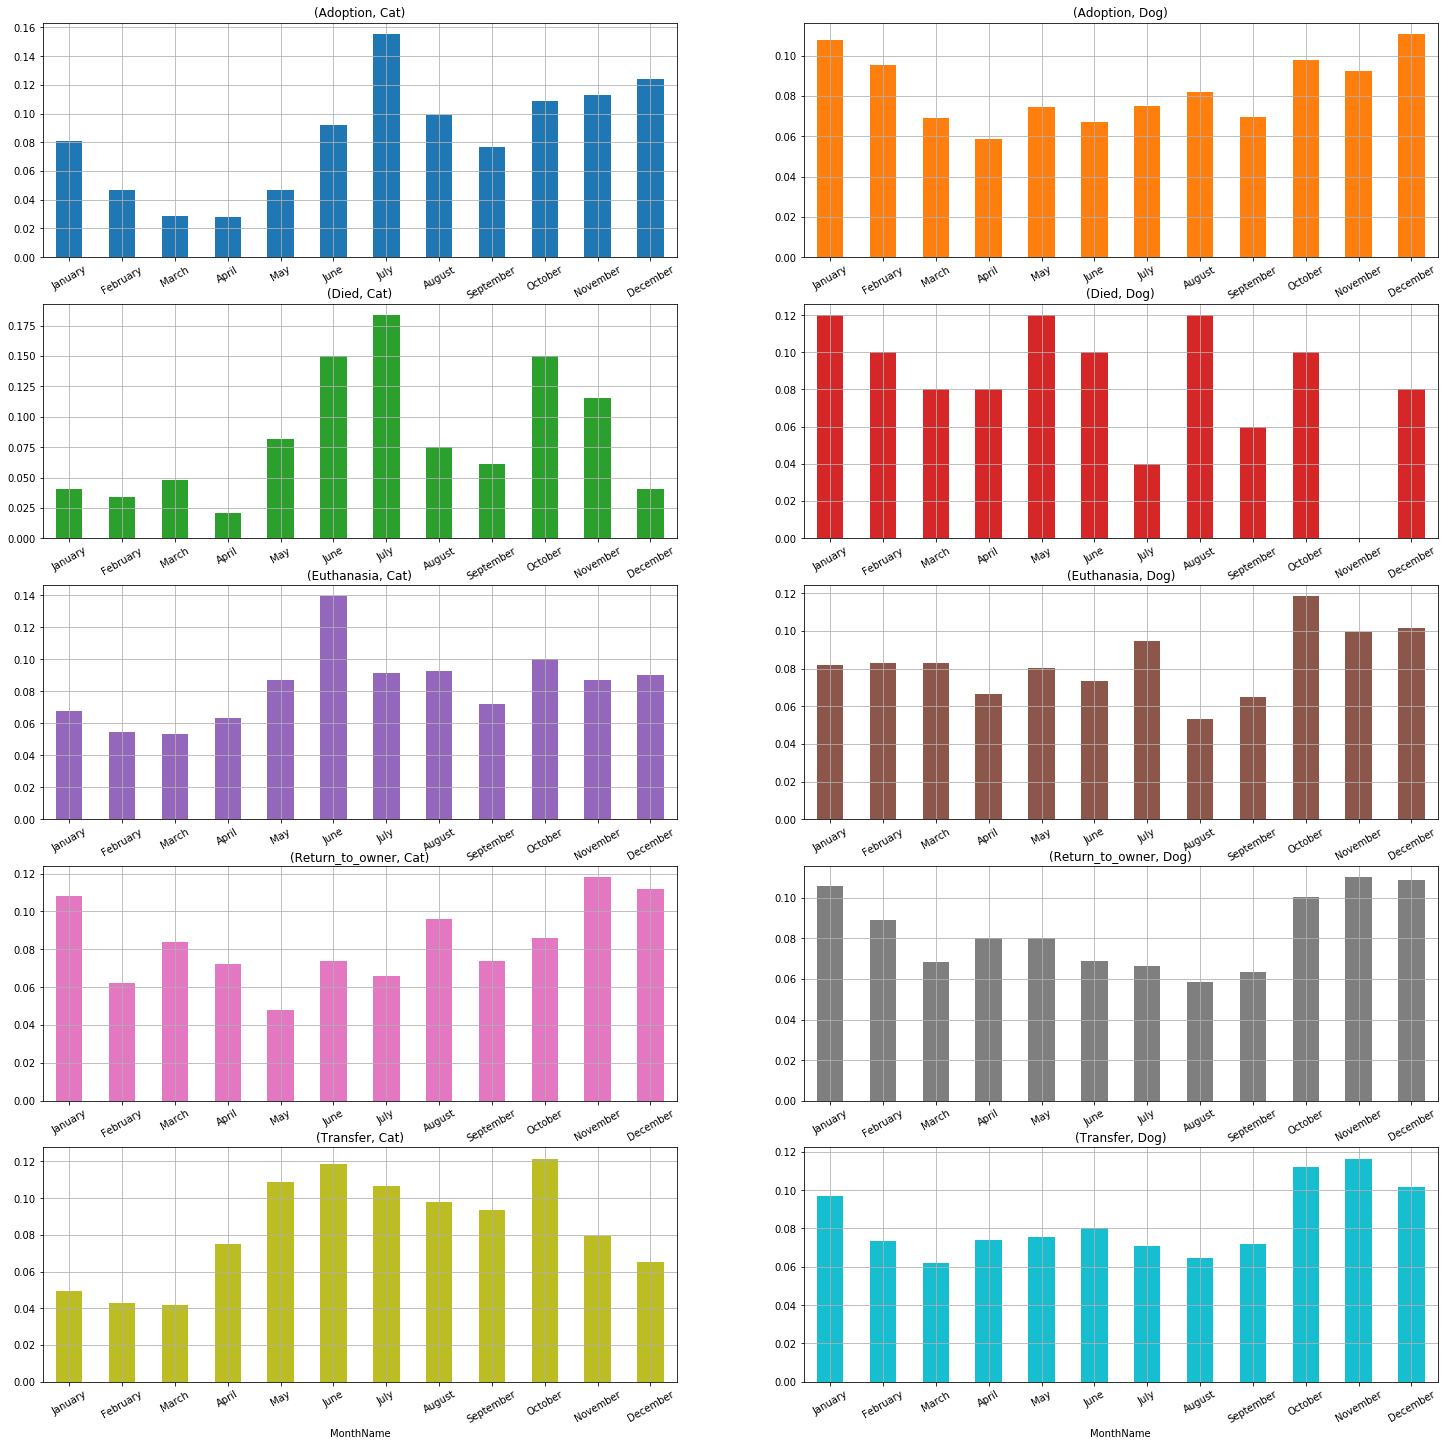

In [14]:
m = pd.crosstab(index = animals.MonthName, columns = [animals.OutcomeType,animals.AnimalType], normalize='columns')
m.plot(kind='bar', subplots=True, layout=(5, 2), figsize=(25, 25), sharex=False, legend=False, rot=30, grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C94CDD8>,
      dtype=object)

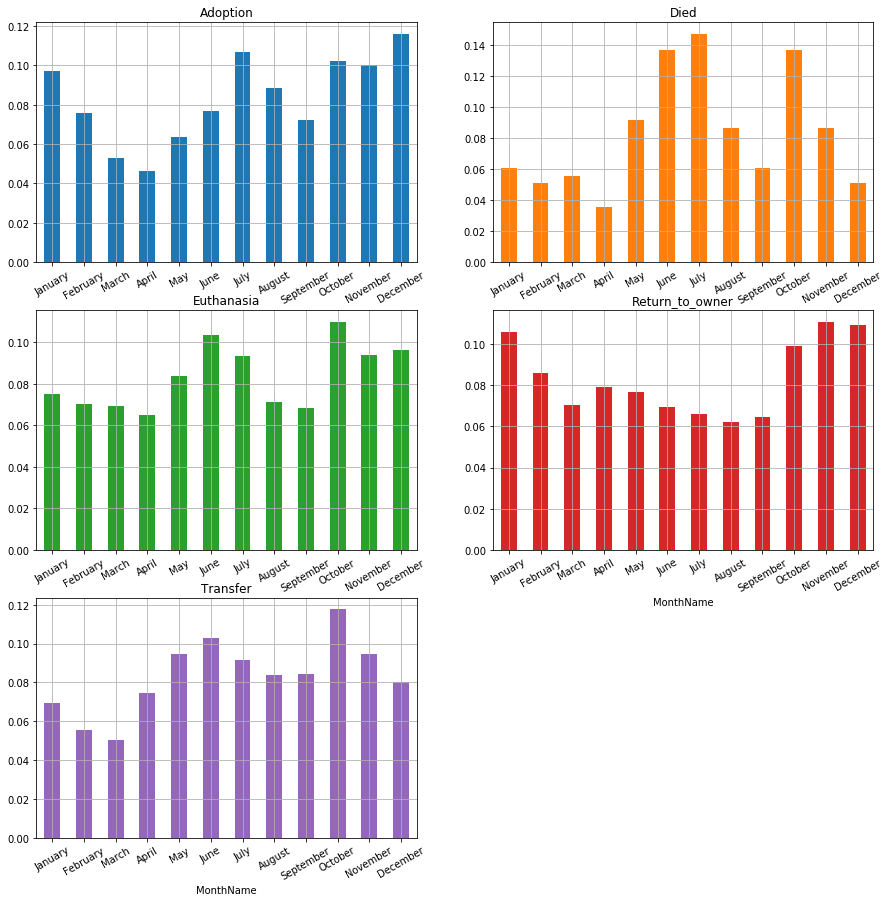

In [15]:
m = pd.crosstab(index = animals.MonthName, columns = animals.OutcomeType, normalize='columns')
m.plot(kind='bar', subplots=True, layout=(3, 2), figsize=(15, 15), sharex=False, legend=False, rot=30, grid=True)

In [16]:
animals['Day'] = animals.index.day
animals['DayName'] = animals.index.strftime('%A')
days_values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
days_cat_type = CategoricalDtype(categories=days_values, ordered=True)
animals.DayName = animals.DayName.astype(days_cat_type)
animals = animals.drop('Day',axis=1)
#animals['IsAdopted'] = animals.OutcomeType.str.contains('Adoption')
animals.head(3)

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Month,MonthName,IsAdopted,DayName
DateTime,,,,,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2,February,False,Wednesday
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,10,October,False,Sunday
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,January,True,Saturday


In [17]:
animals.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

## Conlusion: Adopted animal tend to be on weekend

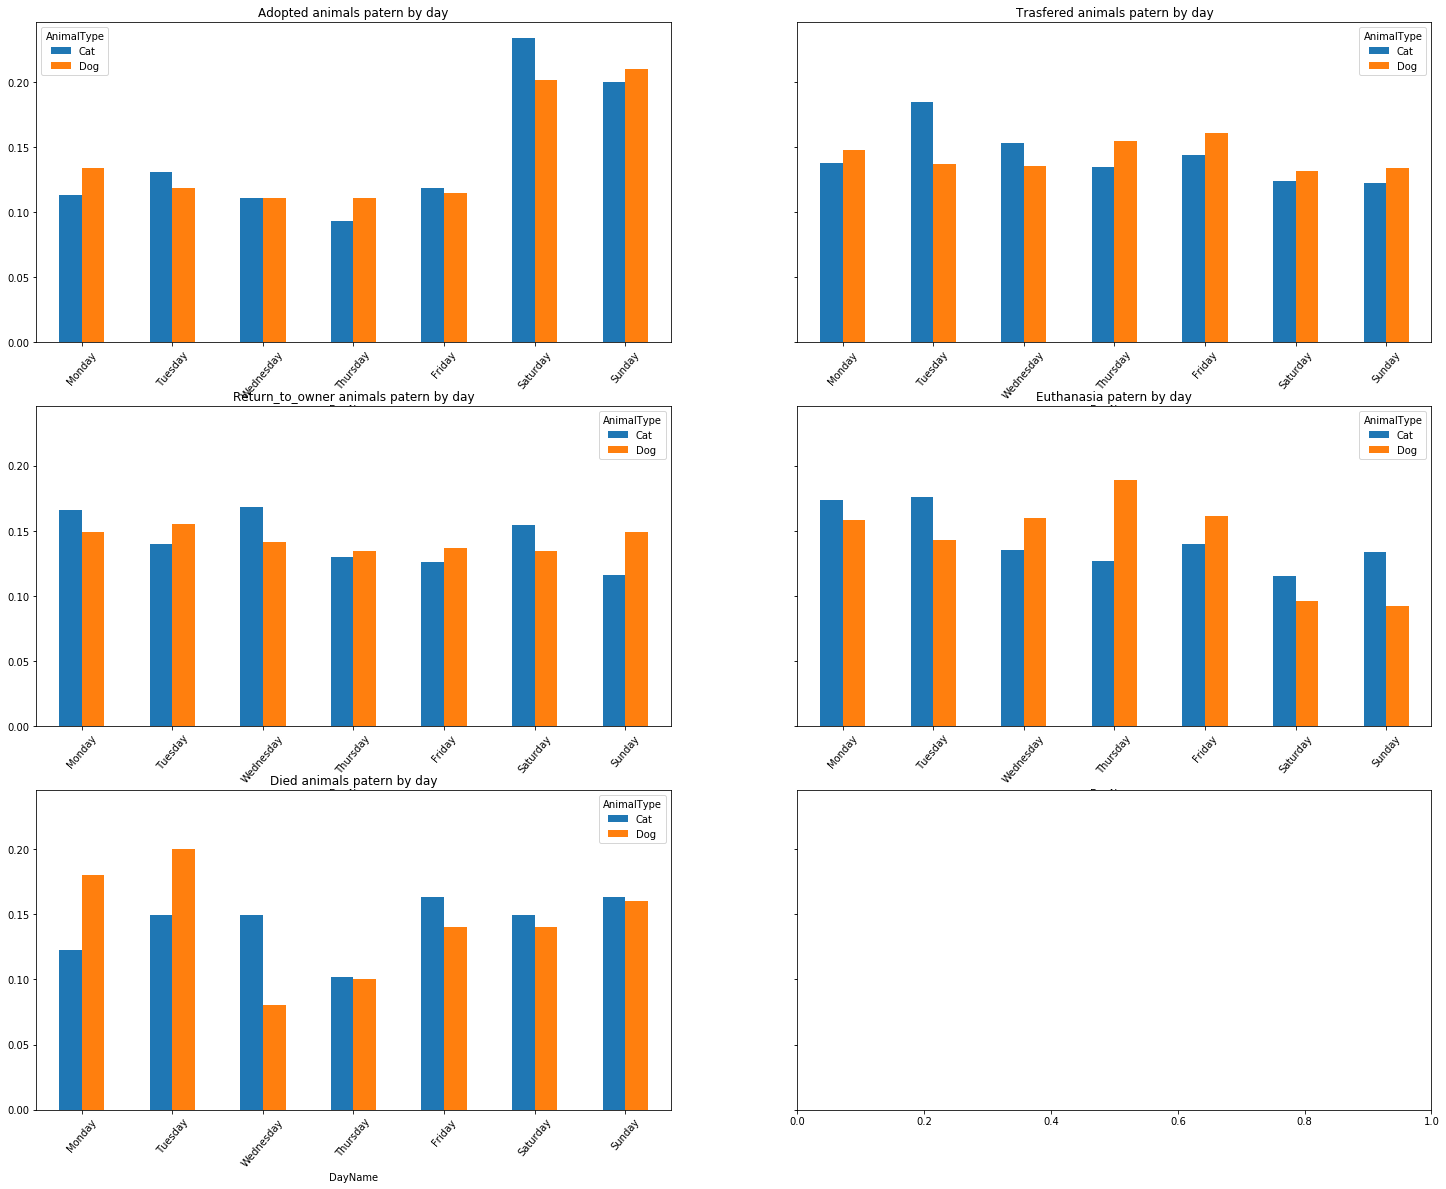

In [18]:
f, axes  = plt.subplots(3, 2 , figsize=(25, 20), sharey=True)
adopted = (animals.IsAdopted == True)
pd.crosstab(index=animals[adopted].DayName, columns= animals[adopted].AnimalType, normalize = 'columns').plot(kind='bar', rot=50, ax=axes[0, 0], title = 'Adopted animals patern by day')
Transfered = (animals.OutcomeType == 'Transfer')
pd.crosstab(index=animals[Transfered].DayName, columns= animals[Transfered].AnimalType, normalize = 'columns').plot(kind='bar', rot=50, ax=axes[0, 1], title = 'Trasfered animals patern by day')
Return_to_owner = (animals.OutcomeType == 'Return_to_owner')
pd.crosstab(index=animals[Return_to_owner].DayName, columns= animals[Return_to_owner].AnimalType, normalize = 'columns').plot(kind='bar', rot=50, ax=axes[1, 0], title = 'Return_to_owner animals patern by day')
Euthanasia = (animals.OutcomeType == 'Euthanasia')
pd.crosstab(index=animals[Euthanasia].DayName, columns= animals[Euthanasia].AnimalType, normalize = 'columns').plot(kind='bar', rot=50, ax=axes[1, 1], title = 'Euthanasia patern by day')
Died = (animals.OutcomeType == 'Died')
pd.crosstab(index=animals[Died].DayName, columns= animals[Died].AnimalType, normalize = 'columns').plot(kind='bar', rot=50, ax=axes[2, 0], title = 'Died animals patern by day')

### ----------------------------------------------------------
# Sex and Sex Procedure
### ----------------------------------------------------------

In [19]:
Sex = {'Neutered Male': 'Male', 'Spayed Female': 'Female', 
                   'Intact Male': 'Male', 'Intact Female': 'Female', 
                   'Unknown':  np.nan}
animals['Sex'] = animals.SexuponOutcome.map(Sex)
#SexProcedure = {'Neutered Male': 'Neutered', 'Spayed Female': 'Neutered', 
#                   'Intact Male': 'Intact', 'Intact Female': 'Intact', 
#                   'Unknown': 'Unknown'}
SexProcedure = {'Neutered Male': 'Neutered', 'Spayed Female': 'Neutered', 
                   'Intact Male': 'Intact', 'Intact Female': 'Intact', 
                   'Unknown': 'Unknown'}
animals['Sex'] = animals.SexuponOutcome.map(Sex)
animals['SexProcedure'] = animals.SexuponOutcome.map(SexProcedure)
animals.head()
show_me = pd.crosstab(index=animals.OutcomeType, columns=animals.Sex, normalize = 'columns')
show_me.head()

Sex,Female,Male
OutcomeType,,
Adoption,0.437029,0.404390
Died,0.006001,0.007366
Euthanasia,0.051334,0.061711
Return_to_owner,0.166167,0.204750
Transfer,0.339470,0.321783


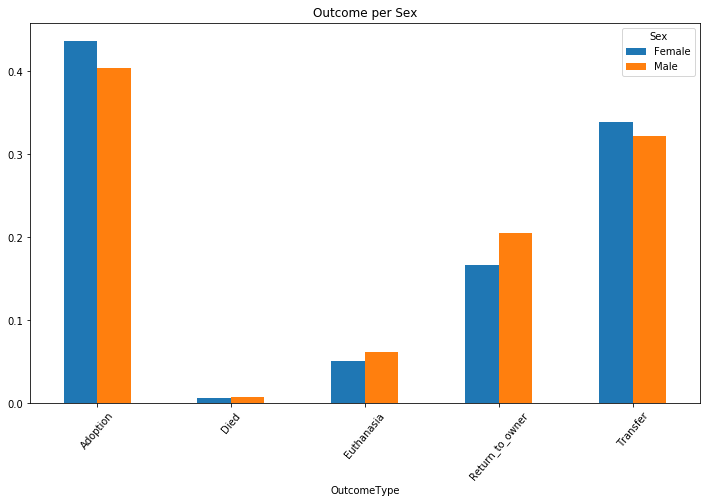

In [20]:
show_me.plot(kind='bar', title = 'Outcome per Sex', rot=50, figsize=(12, 7))

In [21]:
show_me = pd.crosstab(index=animals.OutcomeType, columns=animals.SexuponOutcome, normalize = 'columns')
show_me.head()

SexuponOutcome,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
OutcomeType,,,,,
Adoption,0.057818,0.044823,0.534001,0.587982,0.000000
Died,0.015950,0.022411,0.001943,0.002041,0.022873
Euthanasia,0.114212,0.135319,0.035177,0.026304,0.092406
Return_to_owner,0.085731,0.135319,0.229778,0.198186,0.010979
Transfer,0.726289,0.662128,0.199100,0.185488,0.873742


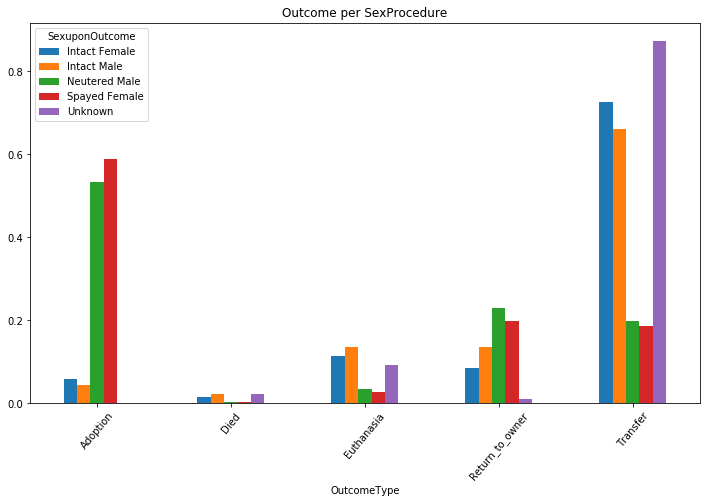

In [22]:
show_me.plot(kind='bar', title = 'Outcome per SexProcedure', rot=50, figsize=(12, 7))

In [23]:
show_me = pd.crosstab(index=animals.OutcomeType, columns=animals.SexProcedure, normalize = 'columns')
show_me.head()

SexProcedure,Intact,Neutered,Unknown
OutcomeType,,,
Adoption,0.051308,0.559600,0.000000
Died,0.019187,0.001989,0.022873
Euthanasia,0.124787,0.030969,0.092406
Return_to_owner,0.110574,0.214796,0.010979
Transfer,0.694144,0.192645,0.873742


# We see that SexProcedure is higly asscosited with adoption and transfer.
## Neutered are more likly to be adopted, while Intact are more liklly to be transfered

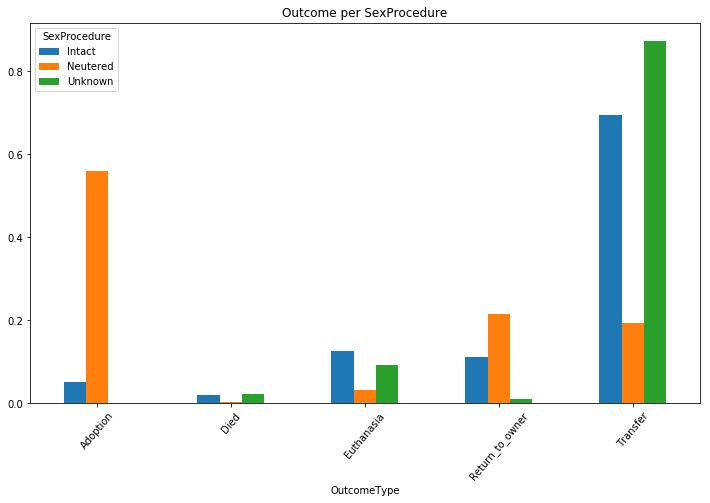

In [24]:
show_me.plot(kind='bar', title = 'Outcome per SexProcedure', rot=50, figsize=(12, 7))

In [25]:
show_me = pd.crosstab(index=animals.OutcomeType, columns=[animals.SexProcedure, animals.AnimalType], normalize = 'columns')
show_me.head()

SexProcedure       Intact            Neutered             Unknown          
AnimalType            Cat       Dog       Cat       Dog       Cat       Dog
OutcomeType                                                                
Adoption         0.058896  0.041068  0.663814  0.509024  0.000000  0.000000
Died             0.025736  0.010351  0.003291  0.001358  0.022638  0.025974
Euthanasia       0.108142  0.147245  0.030114  0.031385  0.088583  0.142857
Return_to_owner  0.006929  0.250417  0.076518  0.281904  0.006890  0.064935
Transfer         0.800297  0.550918  0.226263  0.176330  0.881890  0.766234

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FB2AB00>,
      dtype=object)

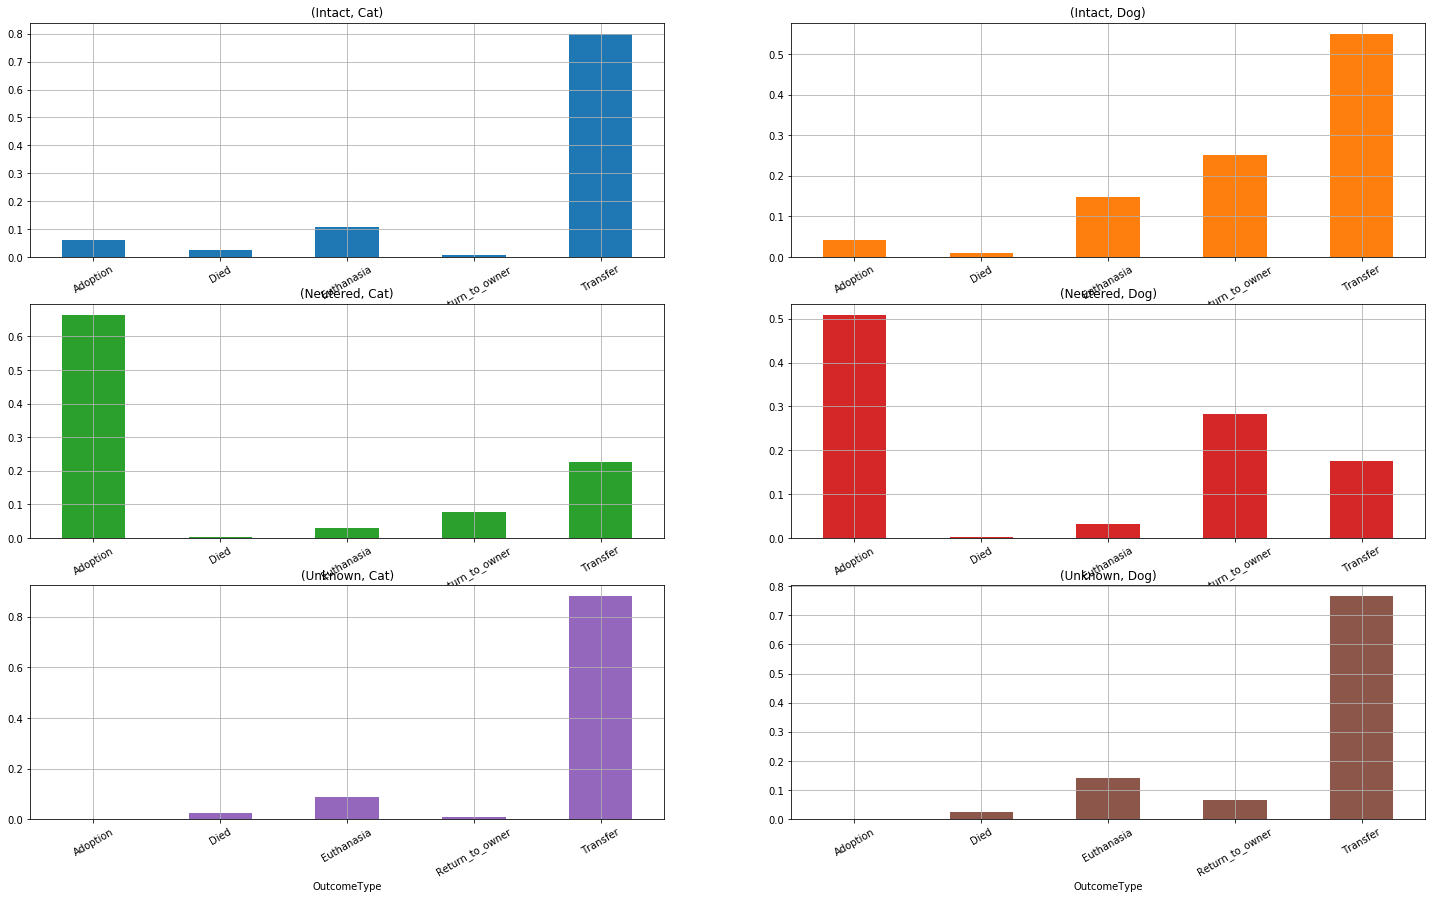

In [26]:
show_me.plot(kind='bar', subplots=True, layout=(5, 2), figsize=(25, 25), sharex=False, legend=False, rot=30, grid=True)

# Age upon Outcome feature

In [27]:
def get_days(period):
    x = str(period).split()
    if len(x)!=2:
        return np.nan
    if 'year' in x[1]:
        return int(x[0])*365
    if 'week' in x[1]:
        return int(x[0])*7
    if 'month' in x[1]:
        return int(x[0])*30
    if 'day' in x[1]:
        return int(x[0])
#    if x[1]=='weeks':
#        return x[0]
#    x = period.split()
#    x[0]

In [28]:
#animals['AgeuponOutcome'].apply(lambda x: str(x).split()[1] if len(str(x).split()) == 2 else np.nan)

In [29]:
animals['AgeuponOutcomePerDay'] = animals.AgeuponOutcome.apply(get_days)
labels = ['baby', 'young', 'young adult', 'adult', 'old']
Age_cat = CategoricalDtype(categories=labels, ordered=True)
animals['AgeCategory'] = pd.qcut(animals['AgeuponOutcomePerDay'], 5,labels=labels).astype(Age_cat)
#animals['AgeCategory'].value_counts()
#animals.head()
#(-0.001, 60.0]      6948  baby
#(60.0, 240.0]       4095  young
#(240.0, 730.0]      8558  young adult
#(730.0, 1095.0]     1823  adult
#(1095.0, 7300.0]    5287  old

In [30]:
cats = (animals.AnimalType == 'Cat')
pd.crosstab(index=animals[cats].OutcomeType, columns= animals[cats].AgeCategory, normalize = 'index')

AgeCategory,baby,young,young adult,adult,old
OutcomeType,,,,,
Adoption,0.466526,0.295178,0.113998,0.027622,0.096676
Died,0.714286,0.095238,0.095238,0.027211,0.068027
Euthanasia,0.306065,0.086037,0.245416,0.049365,0.313117
Return_to_owner,0.038000,0.092000,0.358000,0.100000,0.412000
Transfer,0.485334,0.143560,0.269630,0.032428,0.069047


In [31]:
animals.AgeCategory.value_counts()

young adult    8558
baby           6948
old            5287
young          4095
adult          1823
Name: AgeCategory, dtype: int64

## When checking outcome by age, we see that for dogs young adults are more likely to be adopted, and that for cats 70% of cats that died are babies

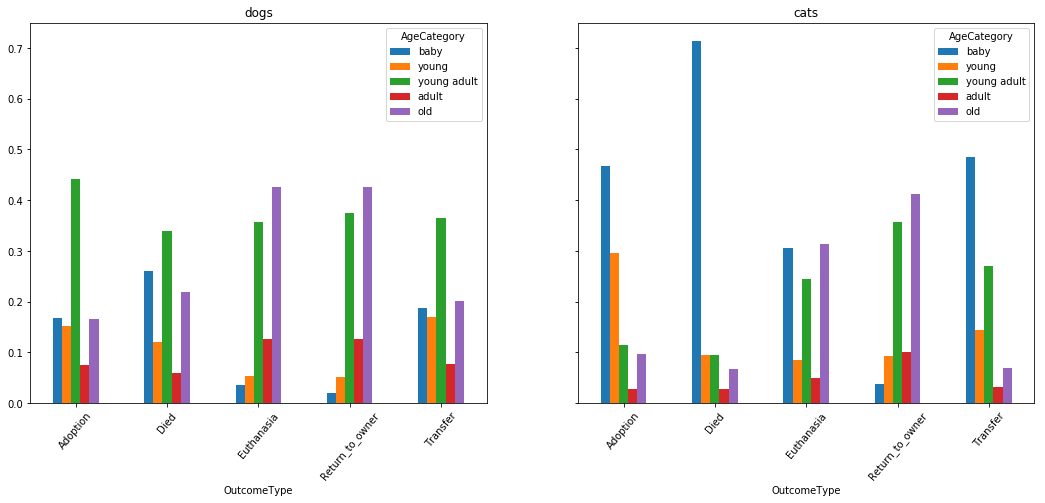

In [32]:
f, (ax1, ax2)  = plt.subplots(1, 2 , figsize=(18, 7), sharey=True)
dogs = (animals.AnimalType == 'Dog')
pd.crosstab(index=animals[dogs].OutcomeType, columns= animals[dogs].AgeCategory, normalize = 'index').plot(kind='bar', rot=50, ax=ax1, title = 'dogs')
cats = (animals.AnimalType == 'Cat')
pd.crosstab(index=animals[cats].OutcomeType, columns= animals[cats].AgeCategory, normalize = 'index').plot(kind='bar', rot=50, ax=ax2, title = 'cats')

## When cheking Age Category by Outcome, wee see strong relationship between the outcome of dog to its age category. E.g older the dog, the less is to be adopted. regrding the cats, it is not behave this way, what is prove the importance to split the data between cats and dogs 

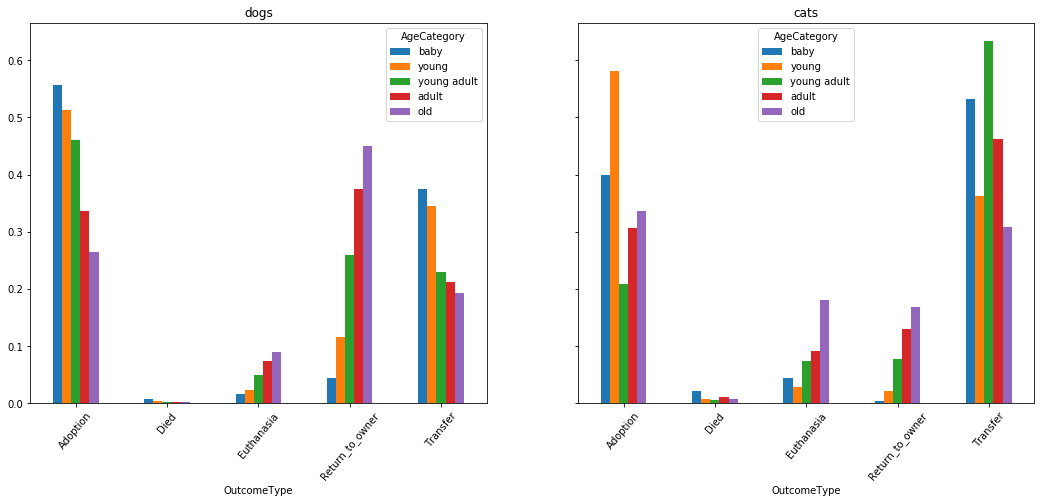

In [33]:
f, (ax1, ax2)  = plt.subplots(1, 2 , figsize=(18, 7), sharey=True)
dogs = (animals.AnimalType == 'Dog')
pd.crosstab(index=animals[dogs].OutcomeType, columns= animals[dogs].AgeCategory, normalize = 'columns').plot(kind='bar', rot=50, ax=ax1, title = 'dogs')
cats = (animals.AnimalType == 'Cat')
pd.crosstab(index=animals[cats].OutcomeType, columns= animals[cats].AgeCategory, normalize = 'columns').plot(kind='bar', rot=50, ax=ax2, title = 'cats')

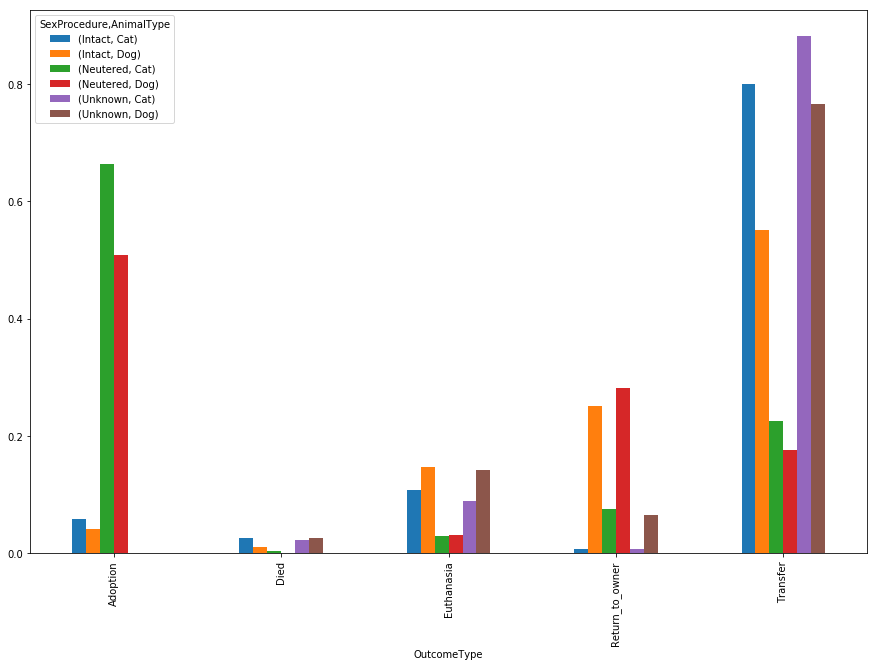

In [34]:
show_me.plot(kind = 'bar', figsize = (15, 10))

# Breed

## Pure Bred

In [35]:
animals['PureBred'] = animals.apply(lambda x: 'mix' if 'Mix' in x.loc['Breed'] or '/' in x.loc['Breed'] else 'pure', axis = 1)

In [36]:
animals.PureBred.value_counts()

mix     25338
pure     1391
Name: PureBred, dtype: int64

In [37]:
show_me = pd.crosstab(index=animals.OutcomeType, columns= animals.PureBred, normalize = 'columns')

## Pure or mix breed is not so importent. No subsuntial diferneces between then

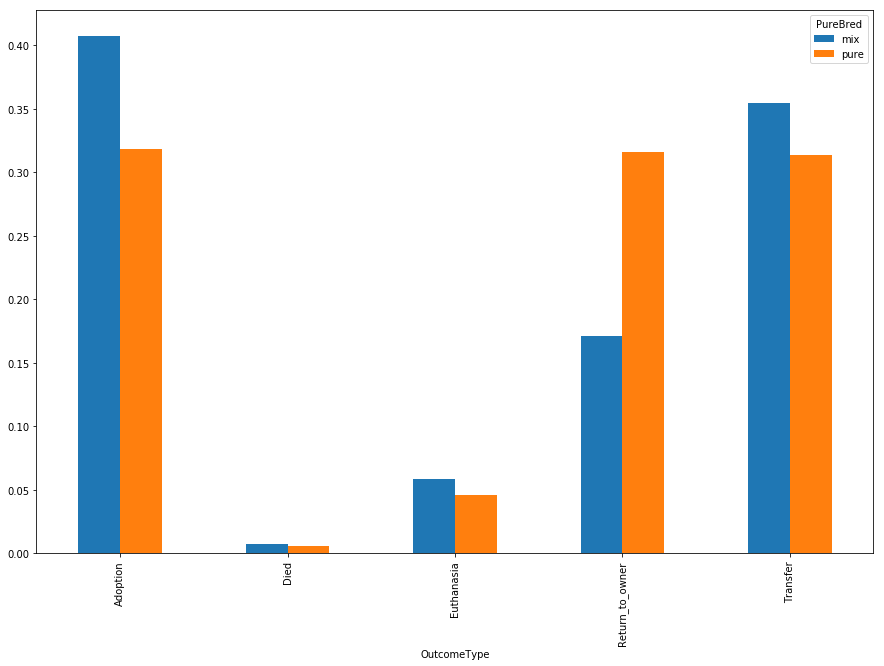

In [38]:
show_me.plot(kind = 'bar', figsize = (15, 10))

In [39]:
animals.Breed.count()

26729

In [40]:
animals.Breed.nunique()

1380

In [41]:
animals['LeadingBreed'] = animals['Breed'].apply(lambda x: x.replace('Mix','').split('/')[0].strip())
animals.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Month,MonthName,IsAdopted,DayName,Sex,SexProcedure,AgeuponOutcomePerDay,AgeCategory,PureBred,LeadingBreed
DateTime,,,,,,,,,,,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2,February,False,Wednesday,Male,Neutered,365.0,young adult,mix,Shetland Sheepdog
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,10,October,False,Sunday,Female,Neutered,365.0,young adult,mix,Domestic Shorthair
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,January,True,Saturday,Male,Neutered,730.0,young adult,mix,Pit Bull
2014-07-11 19:09:00,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,7,July,False,Friday,Male,Intact,21.0,baby,mix,Domestic Shorthair
2013-11-15 12:52:00,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,11,November,False,Friday,Male,Neutered,730.0,young adult,mix,Lhasa Apso


In [42]:
animals.LeadingBreed.nunique()

220

In [43]:
BreedCount = animals.groupby('LeadingBreed')['LeadingBreed'].count()
BreedCountFiltered = BreedCount.loc[BreedCount > 100]
BreedCountFiltered.count()
AnimalsBreed = animals.loc[animals['LeadingBreed'].isin(list(BreedCountFiltered._index))]

In [44]:
AnimalsBreed.LeadingBreed.nunique()

36

In [45]:
pd.crosstab(index=AnimalsBreed.OutcomeType, columns=AnimalsBreed.LeadingBreed)

LeadingBreed,American Bulldog,American Staffordshire Terrier,Anatol Shepherd,Australian Cattle Dog,Australian Kelpie,Australian Shepherd,Beagle,Border Collie,Boxer,Cairn Terrier,...,Pit Bull,Pointer,Pug,Rat Terrier,Rottweiler,Shih Tzu,Siamese,Siberian Husky,Staffordshire,Yorkshire Terrier
OutcomeType,,,,,,,,,,,,,,,,,,,,,
Adoption,45,46,58,243,63,105,91,158,151,82,...,625,73,31,87,59,19,192,68,55,91
Died,0,1,1,1,0,0,1,1,0,0,...,8,0,1,1,0,0,5,0,1,0
Euthanasia,13,11,1,20,3,10,2,13,20,3,...,287,4,2,7,22,5,31,13,12,10
Return_to_owner,42,30,18,126,15,66,75,81,100,22,...,678,20,38,56,75,55,27,85,30,75
Transfer,30,22,40,121,35,48,51,81,89,35,...,515,42,39,64,25,97,171,28,14,50


In [46]:
pd.crosstab(index=AnimalsBreed.OutcomeType, columns=AnimalsBreed.LeadingBreed, normalize='columns')

LeadingBreed,American Bulldog,American Staffordshire Terrier,Anatol Shepherd,Australian Cattle Dog,Australian Kelpie,Australian Shepherd,Beagle,Border Collie,Boxer,Cairn Terrier,...,Pit Bull,Pointer,Pug,Rat Terrier,Rottweiler,Shih Tzu,Siamese,Siberian Husky,Staffordshire,Yorkshire Terrier
OutcomeType,,,,,,,,,,,,,,,,,,,,,
Adoption,0.346154,0.418182,0.491525,0.475538,0.543103,0.458515,0.413636,0.473054,0.419444,0.577465,...,0.295788,0.525180,0.279279,0.404651,0.325967,0.107955,0.450704,0.350515,0.491071,0.402655
Died,0.000000,0.009091,0.008475,0.001957,0.000000,0.000000,0.004545,0.002994,0.000000,0.000000,...,0.003786,0.000000,0.009009,0.004651,0.000000,0.000000,0.011737,0.000000,0.008929,0.000000
Euthanasia,0.100000,0.100000,0.008475,0.039139,0.025862,0.043668,0.009091,0.038922,0.055556,0.021127,...,0.135826,0.028777,0.018018,0.032558,0.121547,0.028409,0.072770,0.067010,0.107143,0.044248
Return_to_owner,0.323077,0.272727,0.152542,0.246575,0.129310,0.288210,0.340909,0.242515,0.277778,0.154930,...,0.320871,0.143885,0.342342,0.260465,0.414365,0.312500,0.063380,0.438144,0.267857,0.331858
Transfer,0.230769,0.200000,0.338983,0.236791,0.301724,0.209607,0.231818,0.242515,0.247222,0.246479,...,0.243729,0.302158,0.351351,0.297674,0.138122,0.551136,0.401408,0.144330,0.125000,0.221239


## The heatmap can apply there is some impact of the breed to the outcome

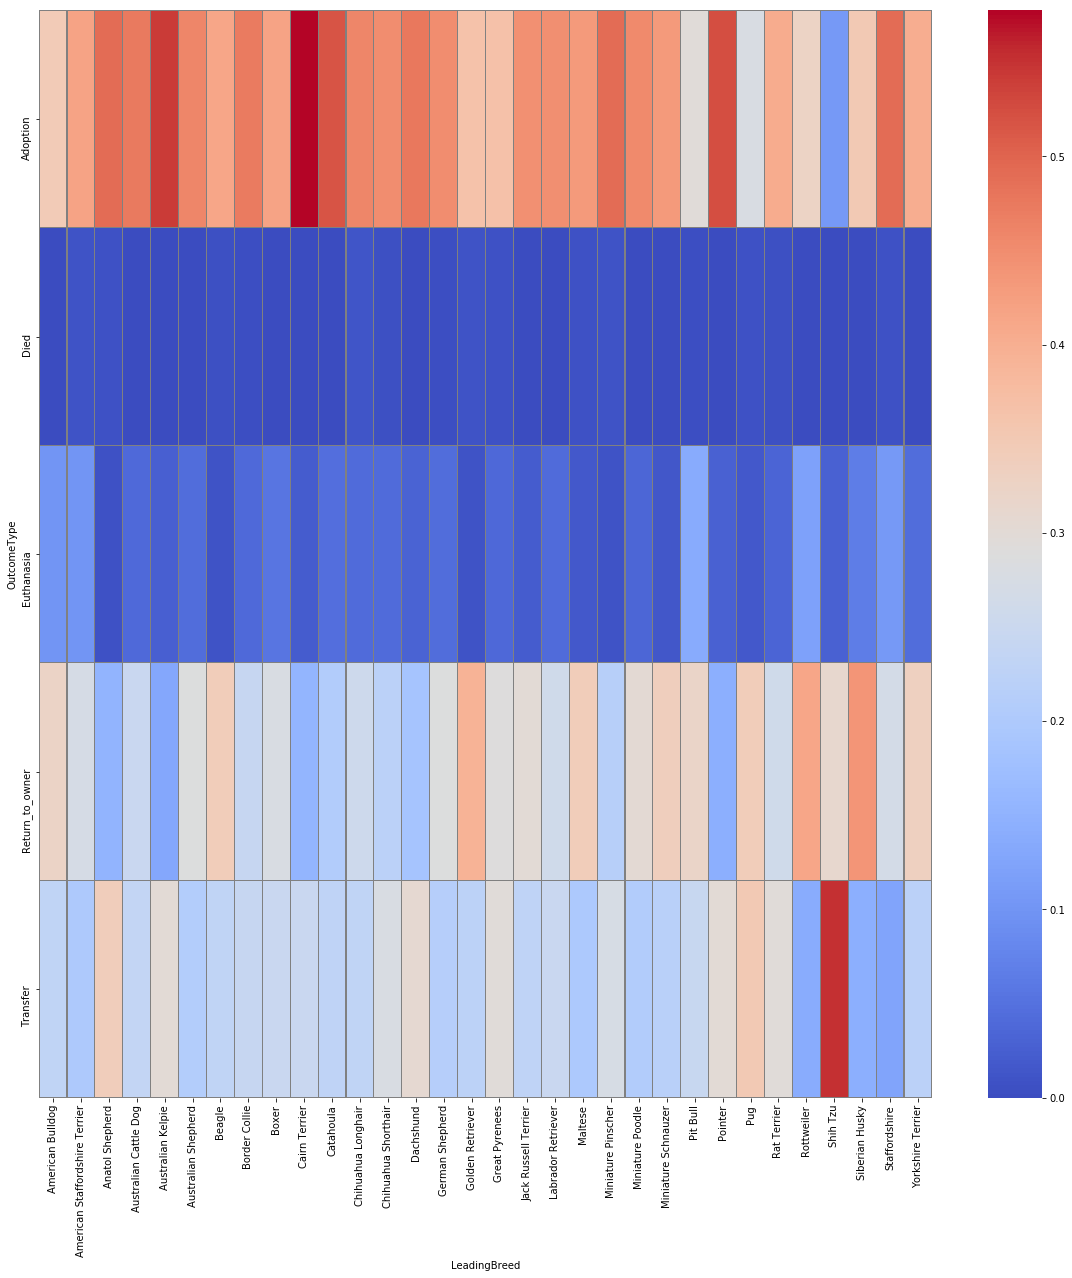

In [47]:
dogs = AnimalsBreed.AnimalType=='Dog'
show_me = pd.crosstab(index=AnimalsBreed.loc[dogs].OutcomeType, columns=AnimalsBreed[dogs].LeadingBreed, normalize='columns')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(ax=ax, data=show_me, 
            linecolor='grey', cmap='coolwarm',
            linewidths=.1)

In [48]:
#animals.loc[animals.AnimalType=='Cat'].LeadingBreed.value_counts()

In [49]:
BreedCount = animals.groupby('LeadingBreed')['LeadingBreed'].count()
BreedCountFiltered = BreedCount.loc[BreedCount > 10]
BreedCountFiltered.count()
AnimalsBreed = animals.loc[animals['LeadingBreed'].isin(list(BreedCountFiltered._index))]

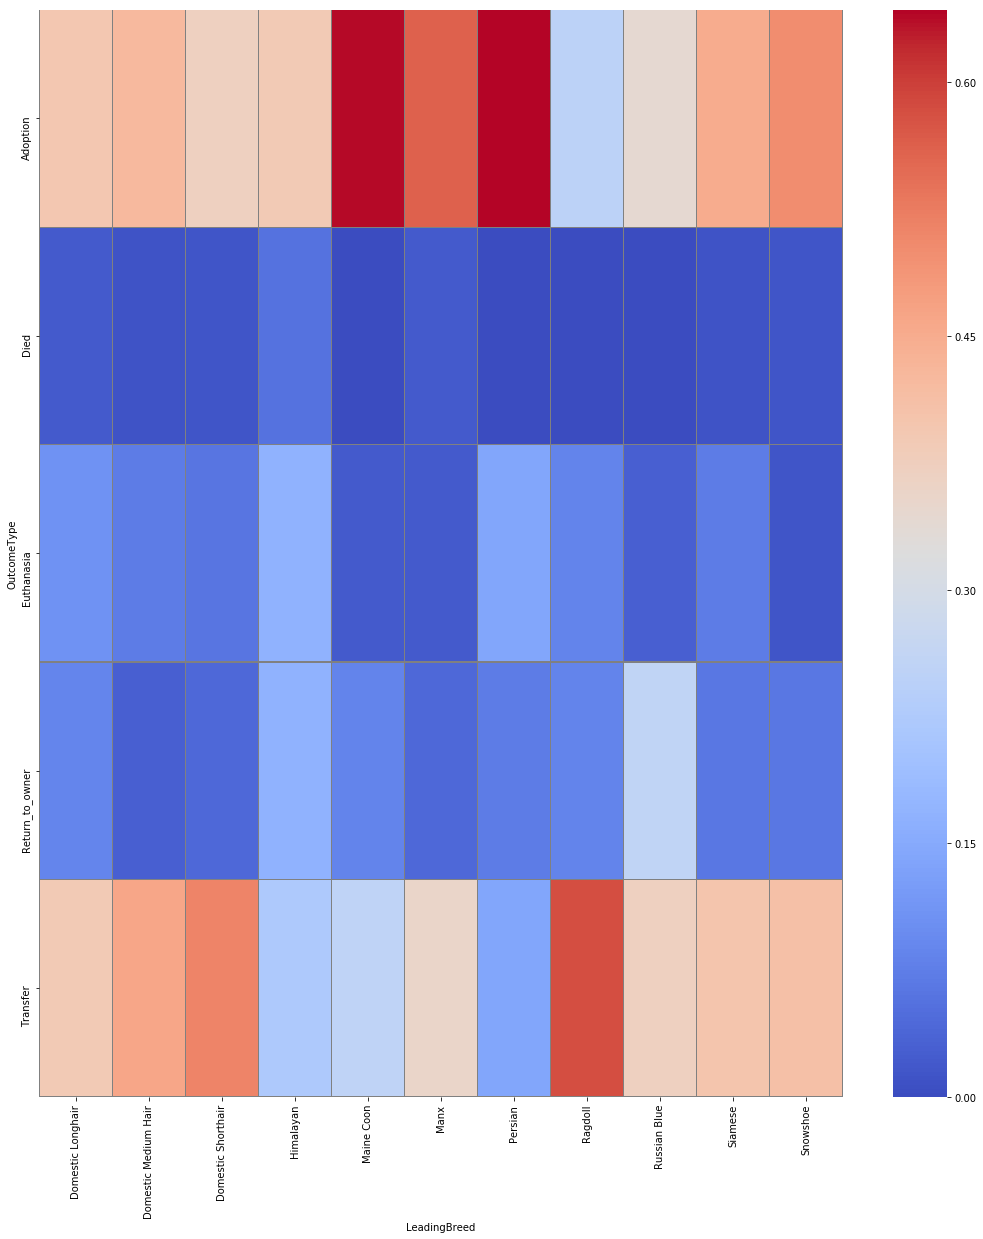

In [50]:
cats = AnimalsBreed.AnimalType=='Cat'
show_me = pd.crosstab(index=AnimalsBreed.loc[cats].OutcomeType, columns=AnimalsBreed[cats].LeadingBreed, normalize='columns')
fig, ax = plt.subplots(figsize=(18, 20))
sns.heatmap(ax=ax, data=show_me, 
            linecolor='grey', cmap='coolwarm',
            linewidths=.1)

# Color

## color of dogs

In [51]:
dogs = animals.AnimalType=='Dog'
animals.loc[dogs].Color.value_counts().head(300)
an1 = animals.loc[dogs].groupby('Color')['Color'].count()
filtered = an1.loc[an1 > 20]
an1.loc[an1 > 20].count()
#an1.loc[an1 <= 20].sum()

62

In [52]:
dogs_color = animals.loc[dogs & animals['Color'].isin(list(filtered._index))]

In [53]:
dogs_color[dogs_color.Color == 'Gold']

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Month,MonthName,IsAdopted,DayName,Sex,SexProcedure,AgeuponOutcomePerDay,AgeCategory,PureBred,LeadingBreed
DateTime,,,,,,,,,,,,,,,,,,,
2016-02-20 12:53:00,A721025,Willie,Return_to_owner,NaN,Dog,Neutered Male,12 years,Labrador Retriever Mix,Gold,2,February,False,Saturday,Male,Neutered,4380.0,old,mix,Labrador Retriever
2014-11-28 15:35:00,A692897,Bailey,Return_to_owner,NaN,Dog,Intact Male,11 years,Golden Retriever Mix,Gold,11,November,False,Friday,Male,Intact,4015.0,old,mix,Golden Retriever
2015-02-04 17:58:00,A695915,Simba,Adoption,NaN,Dog,Neutered Male,1 year,Golden Retriever,Gold,2,February,True,Wednesday,Male,Neutered,365.0,young adult,pure,Golden Retriever
2015-11-05 00:00:00,A609622,Cory,Transfer,Partner,Dog,Spayed Female,8 years,Chihuahua Shorthair/Wire Hair Fox Terrier,Gold,11,November,False,Thursday,Female,Neutered,2920.0,old,mix,Chihuahua Shorthair
2015-11-07 11:21:00,A714671,NaN,Adoption,Foster,Dog,Spayed Female,8 months,Golden Retriever Mix,Gold,11,November,True,Saturday,Female,Neutered,240.0,young,mix,Golden Retriever
2013-11-10 16:54:00,A666911,Bear,Adoption,NaN,Dog,Neutered Male,2 months,Golden Retriever Mix,Gold,11,November,True,Sunday,Male,Neutered,60.0,baby,mix,Golden Retriever
2015-11-27 16:31:00,A715828,Zeus,Adoption,NaN,Dog,Intact Male,5 years,Labrador Retriever Mix,Gold,11,November,True,Friday,Male,Intact,1825.0,old,mix,Labrador Retriever
2014-07-26 16:10:00,A684012,Lucca,Return_to_owner,NaN,Dog,Neutered Male,4 years,Chihuahua Shorthair Mix,Gold,7,July,False,Saturday,Male,Neutered,1460.0,old,mix,Chihuahua Shorthair
2015-06-29 18:29:00,A609918,Billy,Return_to_owner,NaN,Dog,Neutered Male,13 years,Shetland Sheepdog/Pomeranian,Gold,6,June,False,Monday,Male,Neutered,4745.0,old,mix,Shetland Sheepdog


In [54]:
show_me = pd.crosstab(index=dogs_color.OutcomeType, columns=dogs_color.Color, normalize='columns')

## The heatmap can apply there is some impact of the Color to the outcome

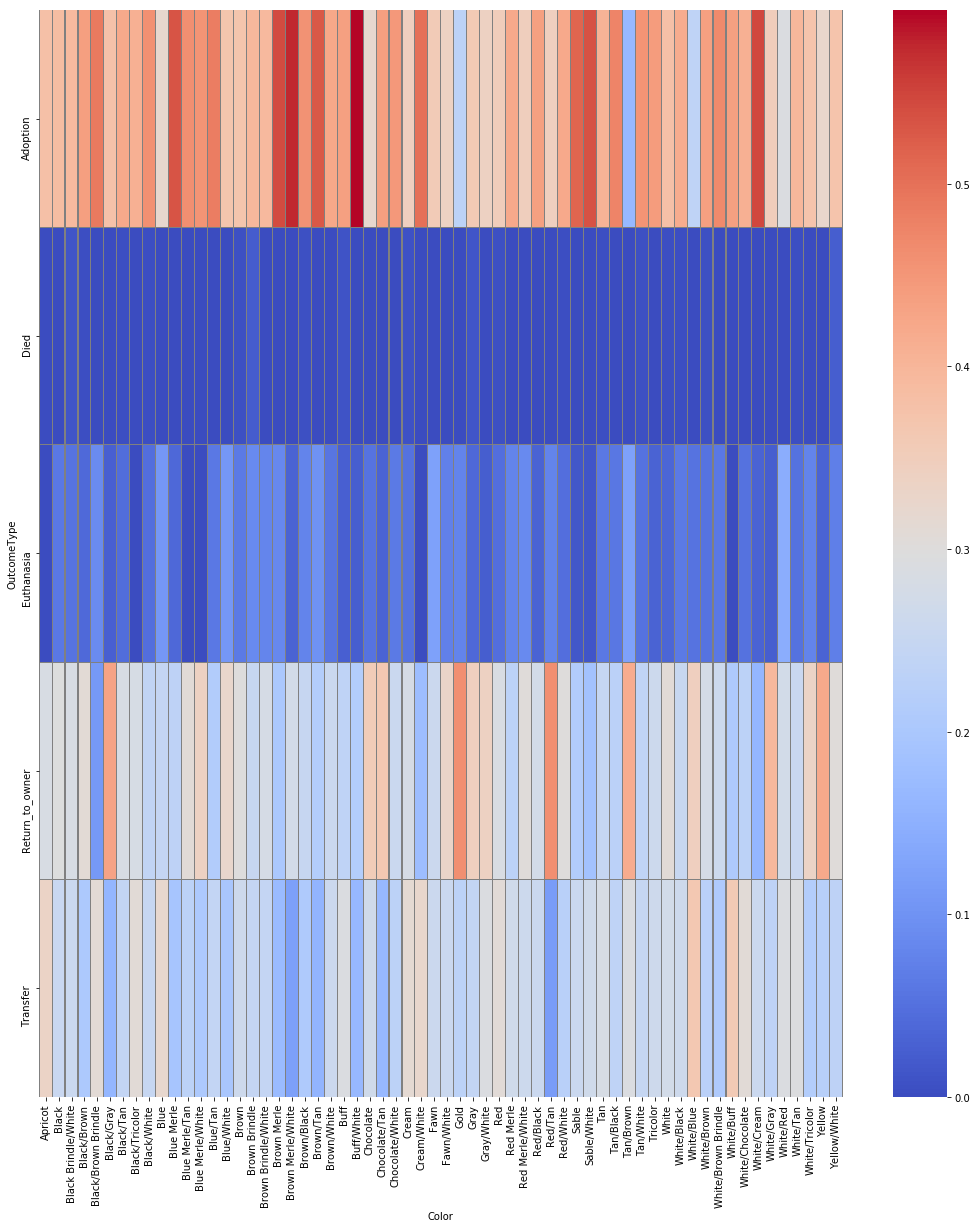

In [55]:
fig, ax = plt.subplots(figsize=(18, 20))
sns.heatmap(ax=ax, data=show_me, 
            linecolor='grey', cmap='coolwarm',
            linewidths=.1)

## color of cats

In [56]:
cats = animals.AnimalType=='Cat'
animals.loc[cats].Color.value_counts().head(300)
an1 = animals.loc[cats].groupby('Color')['Color'].count()
filtered = an1.loc[an1 > 20]
#an1.loc[an1 > 20].count()
#an1.loc[an1 <= 20].sum()

In [57]:
cats_color = animals.loc[cats & animals['Color'].isin(list(filtered._index))]

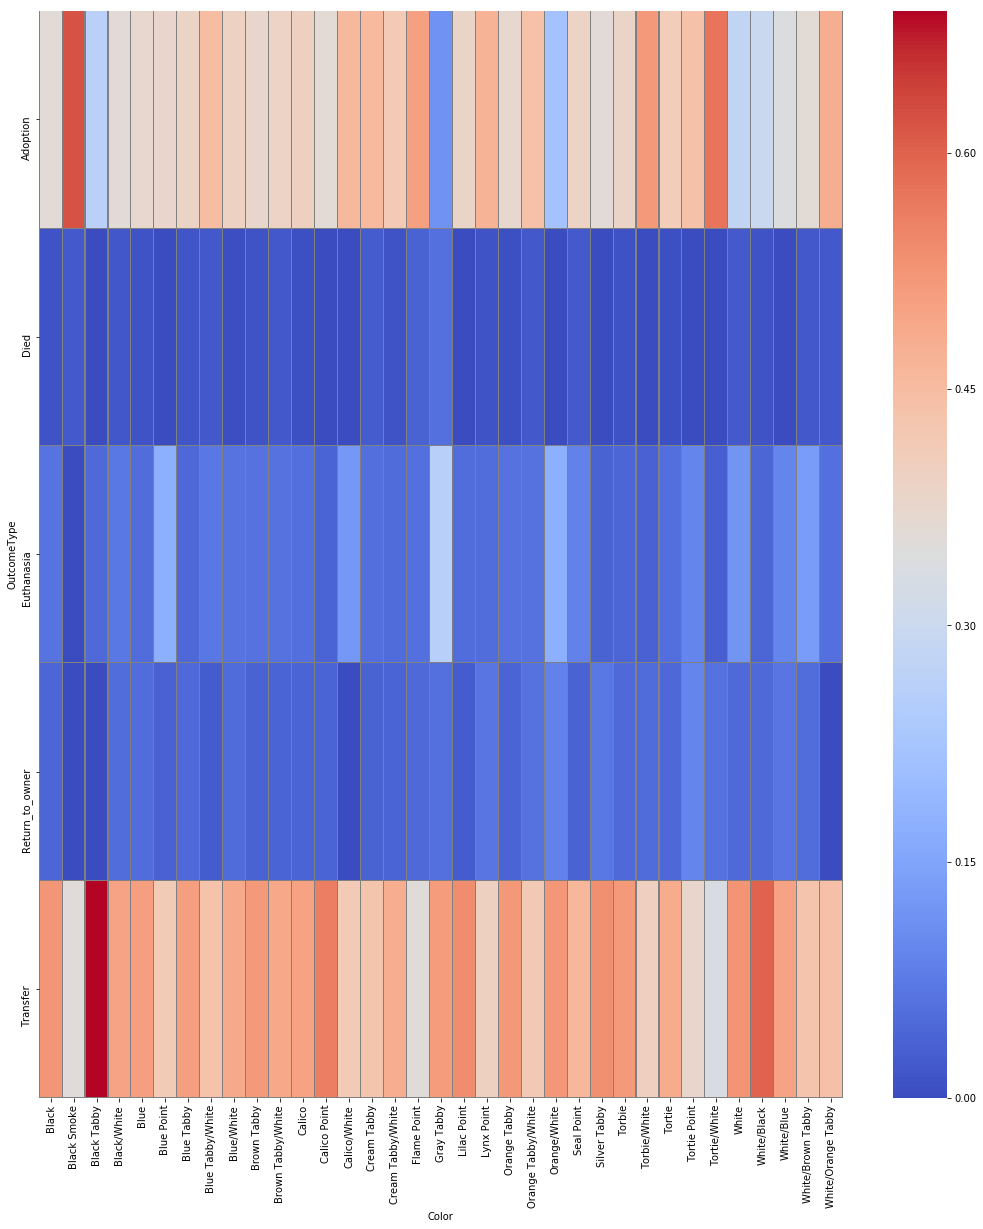

In [58]:
show_me = pd.crosstab(index=cats_color.OutcomeType, columns=cats_color.Color, normalize='columns')
fig, ax = plt.subplots(figsize=(18, 20))
sns.heatmap(ax=ax, data=show_me, 
            linecolor='grey', cmap='coolwarm',
            linewidths=.1)

In [59]:
#animals.drop('OutcomeSubtype', axis = 1, inplace = True)
animals.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Month,MonthName,IsAdopted,DayName,Sex,SexProcedure,AgeuponOutcomePerDay,AgeCategory,PureBred,LeadingBreed
DateTime,,,,,,,,,,,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2,February,False,Wednesday,Male,Neutered,365.0,young adult,mix,Shetland Sheepdog
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,10,October,False,Sunday,Female,Neutered,365.0,young adult,mix,Domestic Shorthair
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,January,True,Saturday,Male,Neutered,730.0,young adult,mix,Pit Bull
2014-07-11 19:09:00,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,7,July,False,Friday,Male,Intact,21.0,baby,mix,Domestic Shorthair
2013-11-15 12:52:00,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,11,November,False,Friday,Male,Neutered,730.0,young adult,mix,Lhasa Apso


# Analysis - Logestic Regression

In [60]:
animals_check = animals.loc[ : , ('OutcomeType','AnimalType', 'MonthName','AgeCategory','SexProcedure','Sex','PureBred','LeadingBreed','Color','Breed','DayName')]
animals_check_2 = pd.get_dummies(animals_check, columns=['AnimalType', 'MonthName','AgeCategory','SexProcedure','Sex','PureBred','LeadingBreed','Color','Breed','DayName'])
anml_train, anml_test = split(animals_check_2, train_size=0.7, random_state=12345)

X = anml_train.drop('OutcomeType', axis = 1)
y = anml_train['OutcomeType']

anml_clf = LogisticRegression(C=5.0).fit(X, y)
anml_train['OutcomeType prediction'] = anml_clf.predict(X)

anml_train.loc[:, ('OutcomeType','OutcomeType prediction')].head()

cm = confusion_matrix(y_true=anml_train['OutcomeType'],
                      y_pred=anml_train['OutcomeType prediction'])
pd.DataFrame(cm,
             index=anml_clf.classes_,
             columns=anml_clf.classes_)


C:\Users\guda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\guda\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Adoption,6580,0,2,603,370
Died,22,4,0,7,106
Euthanasia,190,0,108,175,645
Return_to_owner,1243,1,31,1498,534
Transfer,1632,0,28,476,4455


In [63]:
print(classification_report(y_true=anml_train['OutcomeType'],
                            y_pred=anml_train['OutcomeType prediction']))

                 precision    recall  f1-score   support

       Adoption       0.68      0.87      0.76      7555
           Died       0.80      0.03      0.06       139
     Euthanasia       0.64      0.10      0.17      1118
Return_to_owner       0.54      0.45      0.49      3307
       Transfer       0.73      0.68      0.70      6591

    avg / total       0.67      0.68      0.65     18710



In [64]:
accuracy_score(y_true=anml_train['OutcomeType'],
               y_pred=anml_train['OutcomeType prediction'])

0.6758417958311064

## Validation

In [65]:
X = anml_test.drop('OutcomeType', axis=1)
anml_test['OutcomeType prediction'] = anml_clf.predict(X)

C:\Users\guda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
cm = confusion_matrix(y_true=anml_test['OutcomeType'],
                      y_pred=anml_test['OutcomeType prediction'])
pd.DataFrame(cm,
             index=anml_clf.classes_,
             columns=anml_clf.classes_)


,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Adoption,2667,0,4,355,188
Died,5,0,0,2,51
Euthanasia,86,0,17,71,263
Return_to_owner,634,1,19,541,284
Transfer,759,0,13,232,1827


In [67]:
print(classification_report(y_true=anml_test['OutcomeType'],
                            y_pred=anml_test['OutcomeType prediction']))

                 precision    recall  f1-score   support

       Adoption       0.64      0.83      0.72      3214
           Died       0.00      0.00      0.00        58
     Euthanasia       0.32      0.04      0.07       437
Return_to_owner       0.45      0.37      0.40      1479
       Transfer       0.70      0.65      0.67      2831

    avg / total       0.60      0.63      0.61      8019



In [68]:
accuracy_score(y_true=anml_test['OutcomeType'],
               y_pred=anml_test['OutcomeType prediction'])

0.6300037411148522

In [69]:
X = animals_check_2.drop('OutcomeType', axis=1)
animals['OutcomeType prediction'] = anml_clf.predict(X)
animals.loc[: , ['OutcomeType', 'OutcomeType prediction', 'AnimalType', 'MonthName','AgeCategory','SexProcedure','Sex','PureBred','LeadingBreed','Color','Breed','DayName']].head(10)

,OutcomeType,OutcomeType prediction,AnimalType,MonthName,AgeCategory,SexProcedure,Sex,PureBred,LeadingBreed,Color,Breed,DayName
DateTime,,,,,,,,,,,,
2014-02-12 18:22:00,Return_to_owner,Return_to_owner,Dog,February,young adult,Neutered,Male,mix,Shetland Sheepdog,Brown/White,Shetland Sheepdog Mix,Wednesday
2013-10-13 12:44:00,Euthanasia,Adoption,Cat,October,young adult,Neutered,Female,mix,Domestic Shorthair,Cream Tabby,Domestic Shorthair Mix,Sunday
2015-01-31 12:28:00,Adoption,Adoption,Dog,January,young adult,Neutered,Male,mix,Pit Bull,Blue/White,Pit Bull Mix,Saturday
2014-07-11 19:09:00,Transfer,Transfer,Cat,July,baby,Intact,Male,mix,Domestic Shorthair,Blue Cream,Domestic Shorthair Mix,Friday
2013-11-15 12:52:00,Transfer,Transfer,Dog,November,young adult,Neutered,Male,mix,Lhasa Apso,Tan,Lhasa Apso/Miniature Poodle,Friday
2014-04-25 13:04:00,Transfer,Transfer,Dog,April,baby,Intact,Female,mix,Cairn Terrier,Black/Tan,Cairn Terrier/Chihuahua Shorthair,Friday
2015-03-28 13:11:00,Transfer,Transfer,Cat,March,baby,Intact,Male,mix,Domestic Shorthair,Blue Tabby,Domestic Shorthair Mix,Saturday
2015-04-30 17:02:00,Transfer,Transfer,Cat,April,baby,Unknown,NaN,mix,Domestic Shorthair,Brown Tabby,Domestic Shorthair Mix,Thursday
2014-02-04 17:17:00,Adoption,Adoption,Dog,February,young,Neutered,Female,mix,American Pit Bull Terrier,Red/White,American Pit Bull Terrier Mix,Tuesday


In [70]:
see_what = anml_train.drop('OutcomeType', axis = 1)

In [71]:
see_what.head()

,AnimalType_Cat,AnimalType_Dog,MonthName_January,MonthName_February,MonthName_March,MonthName_April,MonthName_May,MonthName_June,MonthName_July,MonthName_August,...,Breed_Yorkshire Terrier/Rat Terrier,Breed_Yorkshire Terrier/Toy Poodle,DayName_Monday,DayName_Tuesday,DayName_Wednesday,DayName_Thursday,DayName_Friday,DayName_Saturday,DayName_Sunday,OutcomeType prediction
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-10-16 11:34:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Adoption
2014-10-19 19:02:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Adoption
2014-02-08 18:09:00,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Adoption
2015-07-23 09:00:00,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,Transfer
2015-12-13 11:49:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Adoption


# Trying PCA -See if that would help

In [72]:
animals_check = animals.loc[ : , ('OutcomeType','AnimalType', 'MonthName','AgeCategory','SexProcedure','Sex','PureBred','LeadingBreed','Color','Breed','DayName')]
animals_check_2 = pd.get_dummies(animals_check, columns=['AnimalType', 'MonthName','AgeCategory','SexProcedure','Sex','PureBred','LeadingBreed','Color','Breed','DayName'])
anml_train, anml_test = split(animals_check_2, train_size=0.7, random_state=12345)

X_train = anml_train.drop('OutcomeType', axis = 1)
y_train = anml_train['OutcomeType']

X_test = anml_test.drop('OutcomeType', axis = 1)
y_test = anml_test['OutcomeType']

C:\Users\guda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### The number of principal components (_n_\__components_)

In [68]:
anml_train.shape

(18710, 2000)

In [69]:
train_scores = []
test_scores = []
X = X_train.copy()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for k in range(1, 50): #X.shape[1]):
    scaled_pca_transformer = PCA(n_components=k)\
        .fit(X_train_scaled)
        
    X_train_scaled_pca = scaled_pca_transformer\
        .transform(X_train_scaled)
        
    clf = LogisticRegression(C=5)\
        .fit(X_train_scaled_pca, y_train)
    
    X_test_scaled_pca = scaled_pca_transformer\
        .transform(X_test_scaled)
    
    train_scores.append(clf.score(X_train_scaled_pca, y_train))
    test_scores.append(clf.score(X_test_scaled_pca, y_test))

#### according to the graph below, we chose 30 principal componenets

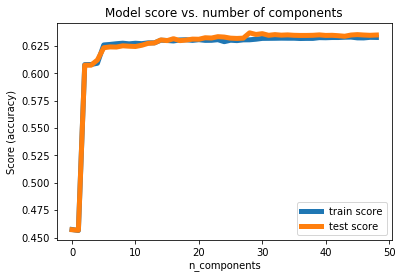

In [70]:
plt.plot(list(zip(train_scores, test_scores)), linewidth=5)
plt.title('Model score vs. number of components')
plt.xlabel('n_components')
plt.ylabel('Score (accuracy)')
plt.legend(['train score', 'test score'], loc='best')

#### we use n_components=30

In [71]:
pca_transformer = PCA(n_components=30).fit(X_train)

In [72]:
X_train_pca = pca_transformer.transform(X_train)


In [73]:
pd.DataFrame(X_train_pca).head()
X_train_pca.shape

(18710, 30)

In [74]:
y.value_counts()

Adoption           7555
Transfer           6591
Return_to_owner    3307
Euthanasia         1118
Died                139
Name: OutcomeType, dtype: int64

In [75]:
outcome_num = {'Transfer': 0, 'Euthanasia': 1, 'Adoption': 2, 'Return_to_owner': 3, 'Died': 4}
#y.map(outcome_num)

#### not say much, since we are using 30 componenets, and the chart below present only 2

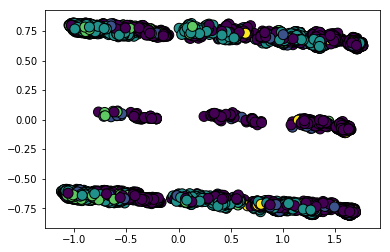

In [76]:
plt.scatter(X_train_pca[:,0], X_train_pca[:, 1], c=y.map(outcome_num), s=100, edgecolor='k' )

In [77]:
anml_clf = LogisticRegression(C=5).fit(X_train_pca,y_train)
anml_train['OutcomeType Pred'] = anml_clf.predict(X_train_pca)

C:\Users\guda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
print(classification_report(y_true=anml_train['OutcomeType'],
                            y_pred=anml_train['OutcomeType Pred']))

                 precision    recall  f1-score   support

       Adoption       0.63      0.86      0.73      7555
           Died       0.00      0.00      0.00       139
     Euthanasia       0.36      0.02      0.04      1118
Return_to_owner       0.45      0.33      0.38      3307
       Transfer       0.70      0.63      0.67      6591

    avg / total       0.60      0.63      0.60     18710



C:\Users\guda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Validation

In [79]:
X_test_pca = pca_transformer.transform(X_test)
anml_test['OutcomeType Pred'] = anml_clf.predict(X_test_pca)

C:\Users\guda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
print(classification_report(y_true=anml_test['OutcomeType'],
                            y_pred=anml_test['OutcomeType Pred']))

                 precision    recall  f1-score   support

       Adoption       0.63      0.86      0.73      3214
           Died       0.00      0.00      0.00        58
     Euthanasia       0.53      0.02      0.04       437
Return_to_owner       0.48      0.34      0.40      1479
       Transfer       0.70      0.64      0.67      2831

    avg / total       0.62      0.64      0.60      8019



C:\Users\guda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### yes! that improved the accuracy a little bit. 

In [81]:
accuracy_score(y_true=anml_test['OutcomeType'],
               y_pred=anml_test['OutcomeType Pred'])

0.6353660057363761

### SCALING : Just to practice. there is no meaning using scaling here, since all variables are dummies with 1/0 values.

In [82]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [83]:
scaled_pca_transformer = PCA(n_components=30).fit(X_train_scaled)
X_train_scaled_pca = scaled_pca_transformer.transform(X_train_scaled)

In [84]:
anml_clf_scaled_pca = LogisticRegression(C=5).fit(X_train_scaled_pca,y_train)
anml_train['OutcomeType Pred pca scaled'] = anml_clf_scaled_pca.predict(X_train_scaled_pca)

C:\Users\guda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
print(classification_report(y_true=anml_train['OutcomeType'],
                            y_pred=anml_train['OutcomeType Pred pca scaled']))

                 precision    recall  f1-score   support

       Adoption       0.49      0.57      0.53      7555
           Died       0.00      0.00      0.00       139
     Euthanasia       0.00      0.00      0.00      1118
Return_to_owner       0.36      0.17      0.23      3307
       Transfer       0.51      0.65      0.57      6591

    avg / total       0.44      0.49      0.46     18710



C:\Users\guda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Conclusion: no good idea to use here a StandardScaler scaler.

## Exmaine traditional loop

In [86]:
norm_scaler = StandardScaler()
X_train_scaled = norm_scaler.fit_transform(X_train)
X_test_scaled = norm_scaler.transform(X_test)
clf = LogisticRegression(C=5)
#clf = neighbors.KNeighborsClassifier()
    
for n in range(1,8):
    pca_transformer = PCA(n)
    X_train_scaled_pca = pca_transformer.fit_transform(X_train_scaled)
    X_test_scaled_pca = pca_transformer.transform(X_test_scaled)

    clf.fit(X_train_scaled_pca, y_train)

    print(f'{n} components:')
    print(clf.score(X_train_scaled_pca, y_train))
    print(clf.score(X_test_scaled_pca, y_test))
    print()

1 components:
0.4494922501336184
0.4501808205511909

2 components:
0.4515766969535008
0.4546701583738621

3 components:
0.4533939070016034
0.4570395311136052

4 components:
0.45916622127204704
0.46502057613168724

5 components:
0.46189203634420095
0.4648958723032797

6 components:
0.4564404061998931
0.4624017957351291

7 components:
0.46729021913415286
0.4733757326349919



## Examine Pipline

In [87]:
steps = [('scale',StandardScaler()),('reduce_dim', PCA()),('clf',LogisticRegression())]
pipe = Pipeline(steps)
    
for n in range(1,10):
    pipe.set_params(reduce_dim__n_components=n)
    cross = cross_val_score(pipe, X_train, y_train, cv=7)
    
    print(f'{n} componenets:')
    print(f'mean: {cross.mean()}')
    print(f'std: {cross.std()}')

1 componenets:
mean: 0.4493851781333756
std: 0.008422433230366257
2 componenets:
mean: 0.45264537397764576
std: 0.010054032653781545
3 componenets:
mean: 0.4543027339549392
std: 0.008329026793710354
4 componenets:
mean: 0.45531748068744765
std: 0.007661231189723436
5 componenets:
mean: 0.45783203234379705
std: 0.010896696842749633
6 componenets:
mean: 0.4588452967055341
std: 0.010145336560727776
7 componenets:
mean: 0.45708192972293843
std: 0.006327525643266249
8 componenets:
mean: 0.46456406016607277
std: 0.01169311635832613
9 componenets:
mean: 0.463227989458952
std: 0.006995149369747427


In [88]:
pca_transformer = PCA(5).fit(X_train, y_train)
X_train_pca = pca_transformer.transform(X_train)
cls = LogisticRegression().fit(X_train_pca, y_train)
cls.score(X_train_pca, y_train)

0.6114911811865312

In [89]:
cls.score(pca_transformer.transform(X_test), y_test)

0.6136675395934655

## Practicing Grid Search

In [90]:
steps = [('scale',StandardScaler()),('reduce_dim', PCA()),('clf',LogisticRegression())]
pipe = Pipeline(steps)

In [91]:
parameters = {
    'reduce_dim__n_components': range (2, 4),
    'clf__C': range(1, 8, 2)
    }

In [92]:
grid_search = GridSearchCV(pipe, parameters, cv= 2)

In [93]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=Non...y='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reduce_dim__n_components': range(2, 4), 'clf__C': range(1, 8, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
grid_search.best_score_

0.4551576696953501

In [95]:
grid_search.best_params_

{'clf__C': 5, 'reduce_dim__n_components': 3}

In [96]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [97]:
y_test_pred = grid_search.predict(X_test)

In [98]:
accuracy_score(y_test_pred, y_test)

0.45891008853971815

In [99]:
grid_search.score(X_test, y_test)

0.45891008853971815

# Exmaine K-Nearest Nieghbors

In [72]:
X_train = anml_train.drop(['OutcomeType','OutcomeType prediction','OutcomeType Pred'], axis = 1)
y_train = anml_train['OutcomeType']

In [74]:
cls = knc(n_neighbors=5, metric= 'manhattan').fit(X_train, y_train)

In [75]:
anml_train['OutcomeType Pred'] = cls.predict(X_train)

C:\Users\guda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
print(classification_report(y_true=y_train,
                            y_pred=anml_train['OutcomeType Pred']))

                 precision    recall  f1-score   support

       Adoption       0.69      0.88      0.77      7555
           Died       0.19      0.03      0.05       139
     Euthanasia       0.53      0.26      0.35      1118
Return_to_owner       0.60      0.52      0.56      3307
       Transfer       0.80      0.69      0.74      6591

    avg / total       0.70      0.71      0.69     18710



In [1]:
X_test = anml_test.drop(['OutcomeType'], axis = 1)
y_test = anml_test['OutcomeType']

NameError: name 'anml_test' is not defined

In [64]:
anml_test['OutcomeType Pred'] = cls.predict(X_test)

C:\Users\guda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
print(classification_report(y_true = y_test,
                           y_pred = anml_test['OutcomeType Pred']))

                 precision    recall  f1-score   support

       Adoption       0.61      0.77      0.68      3214
           Died       0.09      0.02      0.03        58
     Euthanasia       0.22      0.10      0.14       437
Return_to_owner       0.39      0.33      0.36      1479
       Transfer       0.69      0.60      0.64      2831

    avg / total       0.57      0.59      0.57      8019



In [108]:
anml_train

,OutcomeType,AnimalType_Cat,AnimalType_Dog,MonthName_January,MonthName_February,MonthName_March,MonthName_April,MonthName_May,MonthName_June,MonthName_July,...,Breed_Yorkshire Terrier/Toy Poodle,DayName_Monday,DayName_Tuesday,DayName_Wednesday,DayName_Thursday,DayName_Friday,DayName_Saturday,DayName_Sunday,OutcomeType Pred,OutcomeType Pred pca scaled
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-10-16 11:34:00,Transfer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,Adoption,Adoption
2014-10-19 19:02:00,Euthanasia,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Adoption,Transfer
2014-02-08 18:09:00,Adoption,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,Adoption,Adoption
2015-07-23 09:00:00,Transfer,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,Transfer,Transfer
2015-12-13 11:49:00,Adoption,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Adoption,Adoption
2015-11-23 00:00:00,Transfer,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,Adoption,Adoption
2015-05-31 13:46:00,Transfer,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,Transfer,Transfer
2015-05-22 15:04:00,Transfer,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,Adoption,Adoption
2015-03-24 12:30:00,Adoption,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,Adoption,Adoption


# Ensemble

In [104]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=3)
clf3 = SVC()
classifires = [('LR', clf1), ('DT', clf2), ('SVC', clf3)]
clf_voting = VotingClassifier(estimators=classifires, voting='hard')
clf_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('DT', Decisio...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [105]:
clf_voting.score(X_train, y_train)

C:\Users\guda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6122394441475147

In [106]:
clf_voting.score(X_test, y_test)

C:\Users\guda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6094276094276094

In [107]:
classification_report(y_test, clf_voting.predict(X_test))

C:\Users\guda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\guda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'                 precision    recall  f1-score   support\n\n       Adoption       0.56      0.97      0.71      3214\n           Died       0.00      0.00      0.00        58\n     Euthanasia       0.45      0.01      0.02       437\nReturn_to_owner       0.45      0.02      0.04      1479\n       Transfer       0.74      0.62      0.67      2831\n\n    avg / total       0.59      0.61      0.53      8019\n'

In [109]:
anml_train['OutcomeType Voting Hard'] =  clf_voting.predict(X_train)
anml_train.head()

C:\Users\guda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\guda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OutcomeType,AnimalType_Cat,AnimalType_Dog,MonthName_January,MonthName_February,MonthName_March,MonthName_April,MonthName_May,MonthName_June,MonthName_July,...,DayName_Monday,DayName_Tuesday,DayName_Wednesday,DayName_Thursday,DayName_Friday,DayName_Saturday,DayName_Sunday,OutcomeType Pred,OutcomeType Pred pca scaled,OutcomeType Voting Hard
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-10-16 11:34:00,Transfer,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,Adoption,Adoption,Adoption
2014-10-19 19:02:00,Euthanasia,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,Adoption,Transfer,Adoption
2014-02-08 18:09:00,Adoption,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,Adoption,Adoption,Adoption
2015-07-23 09:00:00,Transfer,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,Transfer,Transfer,Transfer
2015-12-13 11:49:00,Adoption,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,Adoption,Adoption,Adoption


## Trying BootStrap - Bagging

In [85]:
clf_base = DecisionTreeClassifier(max_depth=10)
clf_bagging = BaggingClassifier(base_estimator=clf_base , n_estimators=100)
clf_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [86]:
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('DT bagging', 
            clf_bagging.score(X_train, y_train), 
            clf_bagging.score(X_test, y_test)))
print(classification_report(y_test, clf_bagging.predict(X_test)))

DT bagging classifier:
     	train accuracy: 0.67
     	test accuracy: 0.64
                 precision    recall  f1-score   support

       Adoption       0.67      0.81      0.73      3214
           Died       0.00      0.00      0.00        58
     Euthanasia       0.43      0.06      0.10       437
Return_to_owner       0.46      0.42      0.44      1479
       Transfer       0.71      0.68      0.70      2831

    avg / total       0.63      0.64      0.63      8019



C:\Users\guda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
anml_train['OutcomeType Bagging DTs'] = clf_bagging.predict(X_train)

C:\Users\guda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
anml_train.head()

,OutcomeType,AnimalType_Cat,AnimalType_Dog,MonthName_January,MonthName_February,MonthName_March,MonthName_April,MonthName_May,MonthName_June,MonthName_July,...,Breed_Yorkshire Terrier/Rat Terrier,Breed_Yorkshire Terrier/Toy Poodle,DayName_Monday,DayName_Tuesday,DayName_Wednesday,DayName_Thursday,DayName_Friday,DayName_Saturday,DayName_Sunday,OutcomeType Bagging DTs
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-10-16 11:34:00,Transfer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Adoption
2014-10-19 19:02:00,Euthanasia,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Adoption
2014-02-08 18:09:00,Adoption,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Adoption
2015-07-23 09:00:00,Transfer,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,Transfer
2015-12-13 11:49:00,Adoption,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Return_to_owner


# Trying AdaBoost

In [89]:
clf_base = DecisionTreeClassifier(max_depth=3)
clf_adaboost = AdaBoostClassifier(base_estimator=clf_base,
                                  n_estimators=200,
                                  learning_rate=0.01)
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=200, random_state=None)

In [90]:
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('DT ADA boosting', 
            clf_adaboost.score(X_train, y_train), 
            clf_adaboost.score(X_test, y_test)))
print(classification_report(y_test, clf_adaboost.predict(X_test)))

DT ADA boosting classifier:
     	train accuracy: 0.63
     	test accuracy: 0.63
                 precision    recall  f1-score   support

       Adoption       0.61      0.87      0.72      3214
           Died       0.00      0.00      0.00        58
     Euthanasia       0.00      0.00      0.00       437
Return_to_owner       0.47      0.32      0.38      1479
       Transfer       0.72      0.62      0.67      2831

    avg / total       0.59      0.63      0.59      8019



C:\Users\guda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
